In [1]:
import numpy as np
import pandas as pd
import torch

from gym_anytrading.envs import StocksEnv
from gym_anytrading.envs import Actions
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.dqn import MlpPolicy

# from agent import Agent
# from rat.test_env import StockTradingEnv
import yfinance as yf
import quantstats as qs

In [28]:
total_profit=[]

In [ ]:
np.save("total_profit_21_1_4_22_5_10_1d_19m_19p.npy", np.array(total_profit))

## Test gymnas

In [29]:
from matplotlib import pyplot as plt
import gymnasium as gym
import gym_trading_env

# data = yf.download("AAPL",period="50d", interval="1d")
# data = yf.download("AAPL",period="730d", interval="1h")
data = yf.download("AAPL",start="2021-01-01",end="2022-05-11", interval="1d")
# data = yf.download("AAPL",period="3d", interval="1h")

data.columns=[i.lower() for i in data.columns]

data=data.tz_localize(None)
env=gym.make("TradingEnv",
         name="Apple",
         df=data,  # Your dataset with your custom features
         positions=[-1, 0, 1],  # -1 (=SHORT), 0(=OUT), +1 (=LONG)
         trading_fees=0.18 / 100,  # 0.01% per stock buy / sell (Binance fees)
         borrow_interest_rate=0.0003 / 100,  # 0.0003% per timestep (one timestep = 1h here)
         )

data.index=pd.DatetimeIndex([i.replace(tzinfo=None) for i in data.index])
model=r"D:\all projects\stock-traiding\models_backup\back_gym\gymnasium_1000000.zip"

loaded_model = DQN.load(model)


observation, info = env.reset()

total_profit=[]

while True:
    action, _states = loaded_model.predict(observation)


    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_profit.append(info["portfolio_valuation"])

    if done:
        env.unwrapped.save_for_render(dir = "render_logs")
        break

env.close()

# print("action_stats:", action_stats)
print("info:", info)

[*********************100%%**********************]  1 of 1 completed

Market Return : 19.40%   |   Portfolio Return : 19.91%   |   
info: {'idx': 340, 'step': 340, 'date': numpy.datetime64('2022-05-10T00:00:00.000000000'), 'position_index': array(2, dtype=int64), 'position': 1, 'real_position': 0.9999965073830392, 'data_close': 154.50999450683594, 'data_volume': 115366700.0, 'data_high': 156.74000549316406, 'data_adj close': 152.78147888183594, 'data_low': 152.92999267578125, 'data_open': 155.52000427246094, 'portfolio_valuation': 1199.0519718182477, 'portfolio_distribution_asset': 7.76032507033676, 'portfolio_distribution_fiat': 0.0041878292536239314, 'portfolio_distribution_borrowed_asset': 0, 'portfolio_distribution_borrowed_fiat': 0, 'portfolio_distribution_interest_asset': 0.0, 'portfolio_distribution_interest_fiat': 0.0, 'reward': 0.015983563592235385}


In [2]:
total_profit=np.load("total_profit_21_1_4_22_5_10_1d_19m_19p.npy")

In [3]:
data = yf.download("AAPL",start="2021-01-01",end="2022-05-11", interval="1d")

[*********************100%%**********************]  1 of 1 completed


D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)


                           Strategy
-------------------------  ----------
Start Period               2021-01-06
End Period                 2022-05-10
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          18.87%
CAGR﹪                     9.32%

Sharpe                     0.61
Prob. Sharpe Ratio         76.06%
Smart Sharpe               0.6
Sortino                    0.9
Smart Sortino              0.89
Sortino/√2                 0.64
Smart Sortino/√2           0.63
Omega                      1.11

Max Drawdown               -20.81%
Longest DD Days            199
Volatility (ann.)          27.02%
Calmar                     0.45
Skew                       0.12
Kurtosis                   0.81

Expected Daily %           0.05%
Expected Monthly %         1.02%
Expected Yearly %          9.03%
Kelly Criterion            4.8%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.73%
Expected Shortfall (cVaR)  -2.73%

Max Consecutive Wins       11


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-03-14,2022-05-10,127,-20.814201,-20.057147
2,2021-01-27,2021-03-08,2021-08-13,199,-19.481061,-17.031306
3,2021-09-08,2021-09-20,2021-10-27,50,-8.775289,-8.462576
4,2021-12-13,2021-12-20,2021-12-23,11,-5.405392,-4.630805
5,2021-01-11,2021-01-15,2021-01-20,10,-3.718291,-3.195760


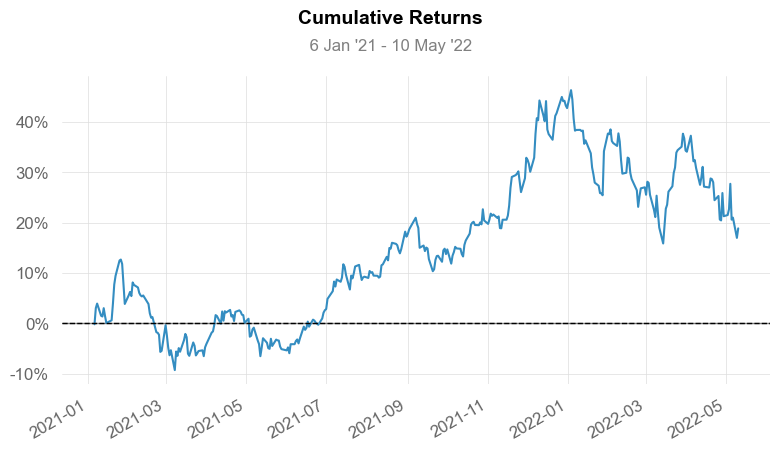

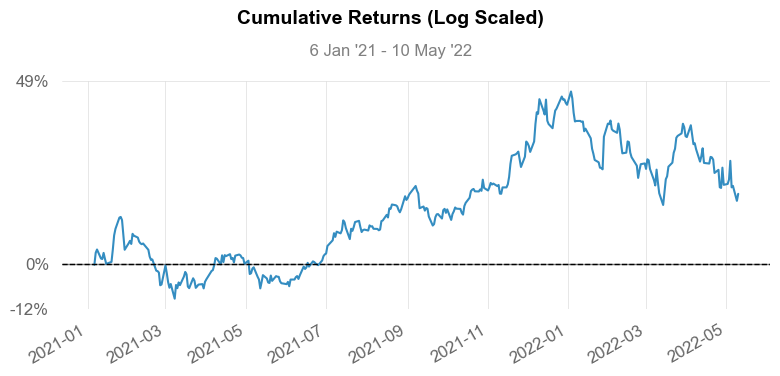

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


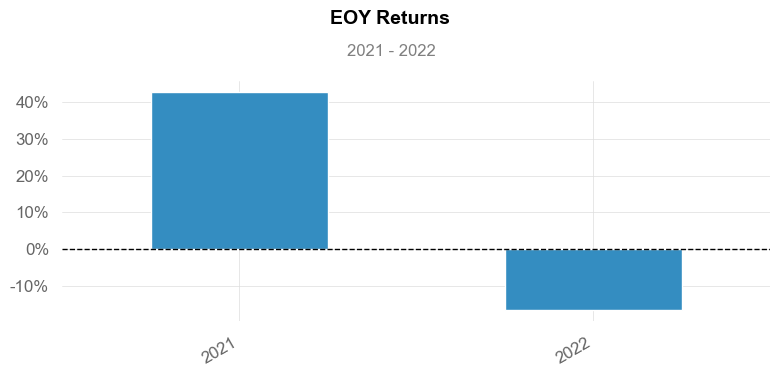

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


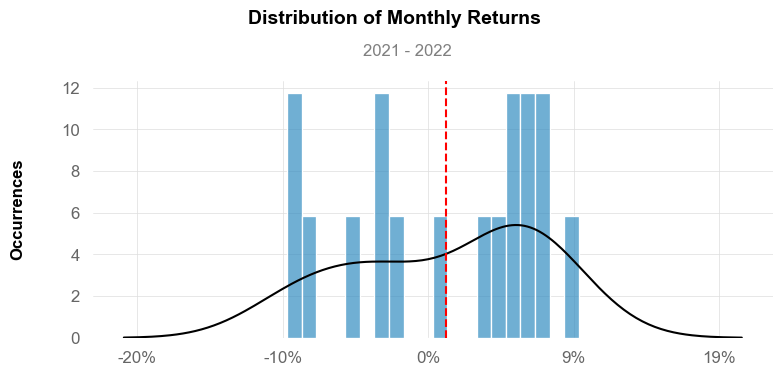

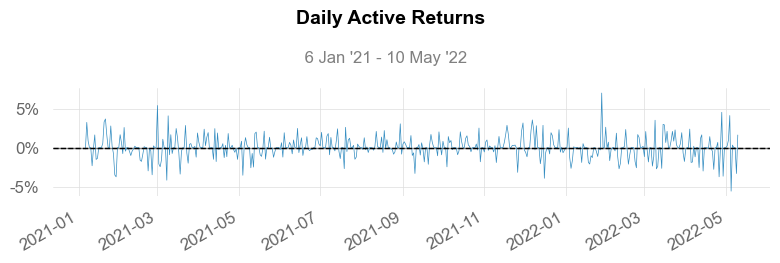

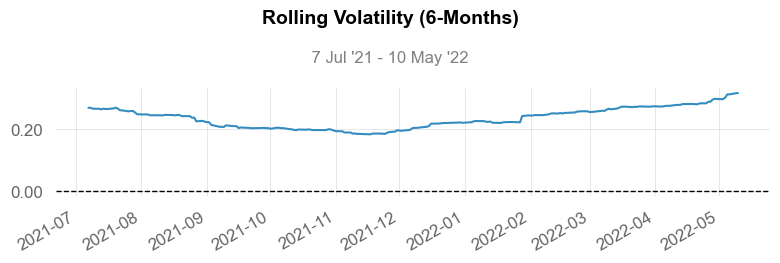

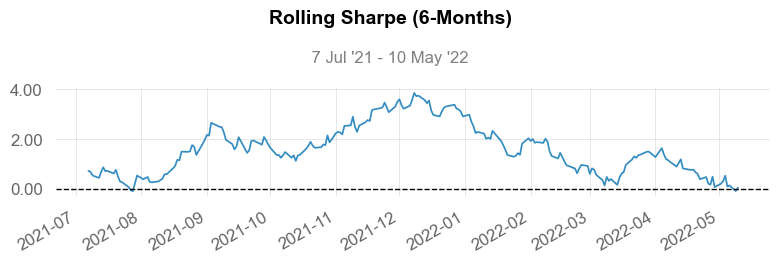

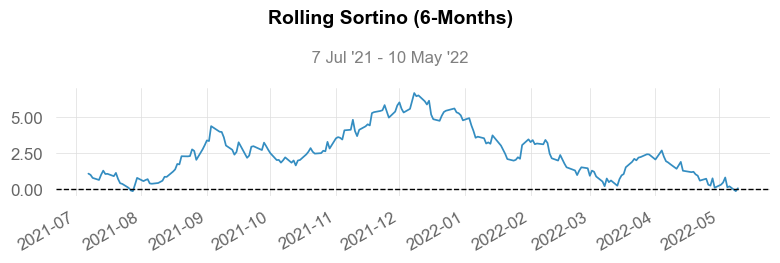

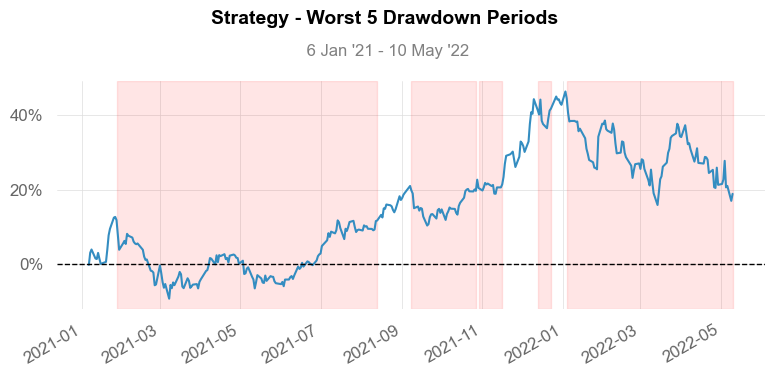

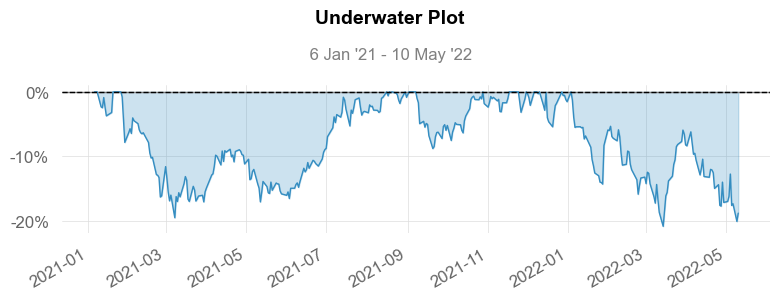

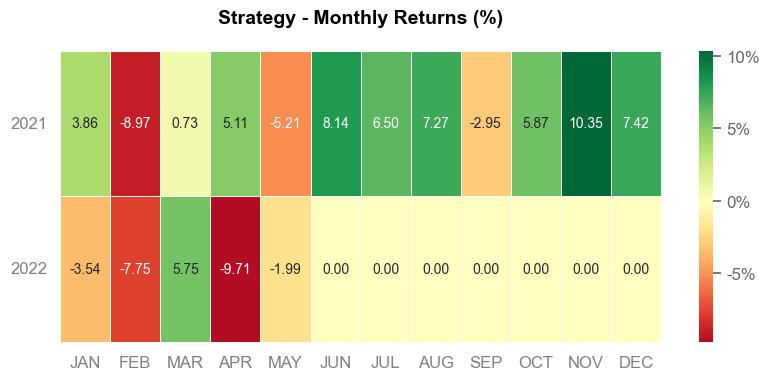

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1019: FutureWarni

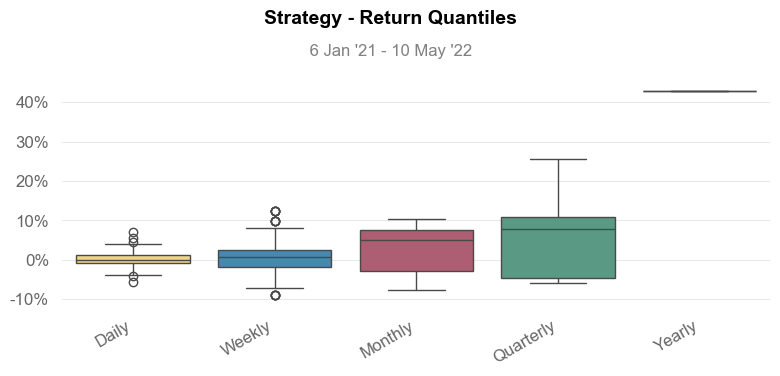

In [4]:
qs.extend_pandas()

net_worth = pd.Series(total_profit, index=data.index[1:])

returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='SB3_a2c_quantstats.html')

## anytrade

In [7]:
from matplotlib import pyplot as plt

data = yf.download("AAPL",period="50d", interval="1d")
# data = yf.download("AAPL",period="730d", interval="1h")
data = yf.download("AAPL",start="2021-01-01",end="2022-05-11", interval="1d")
data = yf.download("AAPL", period="5d", interval="1m")
start_index=30

end_index=len(data)

env = StocksEnv(df=data, window_size=start_index, frame_bound=(start_index, end_index))


model=r"D:\all projects\stock-traiding\models\rl_model_1000000_steps.zip"
loaded_model = DQN.load(model)
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = loaded_model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    
    # env.render()
    if done:
        break
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()

plt.show()
env.close()

print("action_stats:", action_stats)
print("info:", info)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)


                           Strategy
-------------------------  ----------
Start Period               2024-05-06
End Period                 2024-05-10
Risk-Free Rate             0.0%
Time in Market             9.0%

Cumulative Return          -90.21%
CAGR﹪                     -100.0%

Sharpe                     -4.68
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -4.29
Sortino                    -4.49
Smart Sortino              -4.12
Sortino/√2                 -3.17
Smart Sortino/√2           -2.91
Omega                      0.0

Max Drawdown               -90.06%
Longest DD Days            5
Volatility (ann.)          6.5%
Calmar                     -1.11
Skew                       -3.15
Kurtosis                   8.1

Expected Daily %           -0.12%
Expected Monthly %         -90.21%
Expected Yearly %          -90.21%
Kelly Criterion            -
Risk of Ruin               1.0%
Daily Value-at-Risk        -0.79%
Expected Shortfall (cVaR)  -0.79%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-05-06,2024-05-10,2024-05-10,5,-90.058077,-89.764897


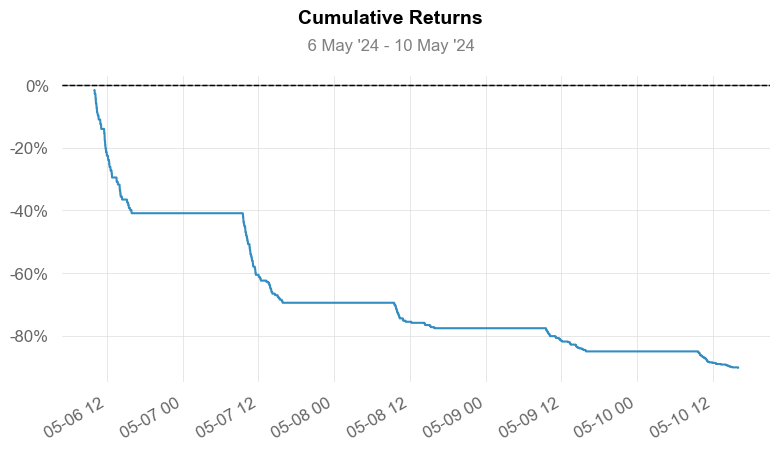

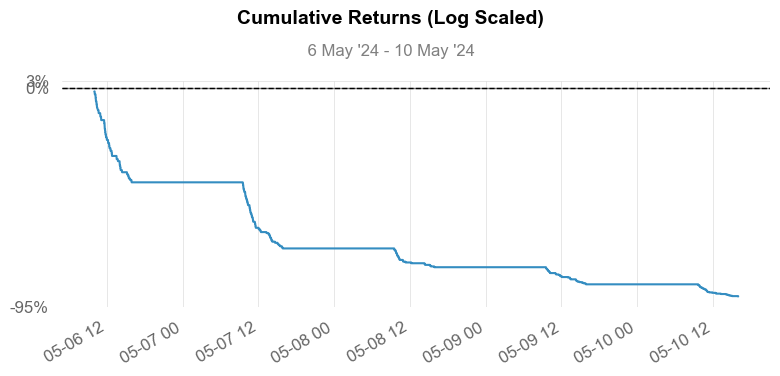

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


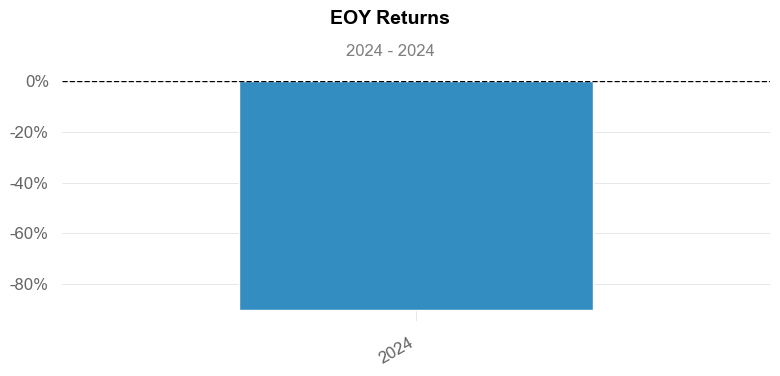

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:516: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(data=combined_returns, color="black", ax=ax)


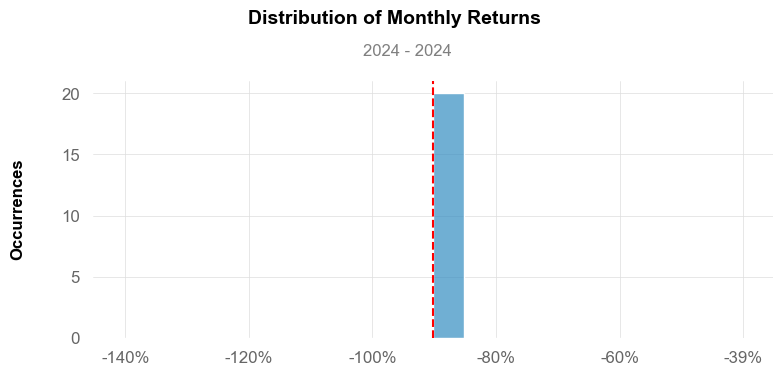

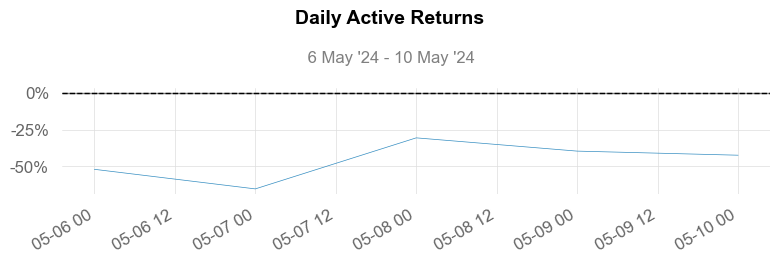

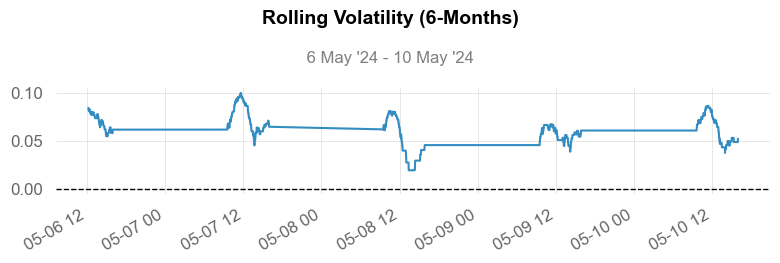

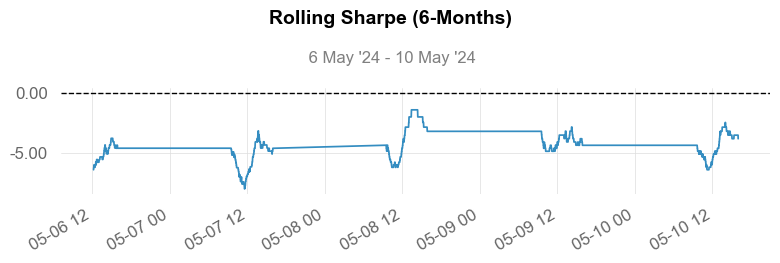

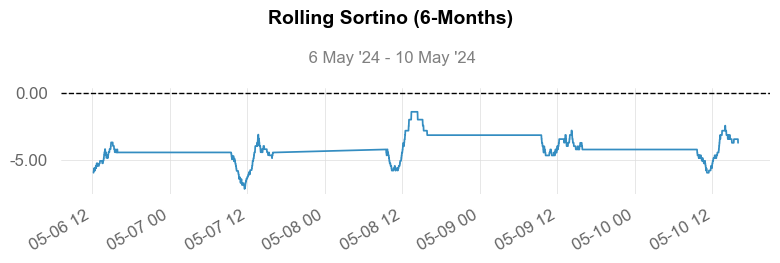

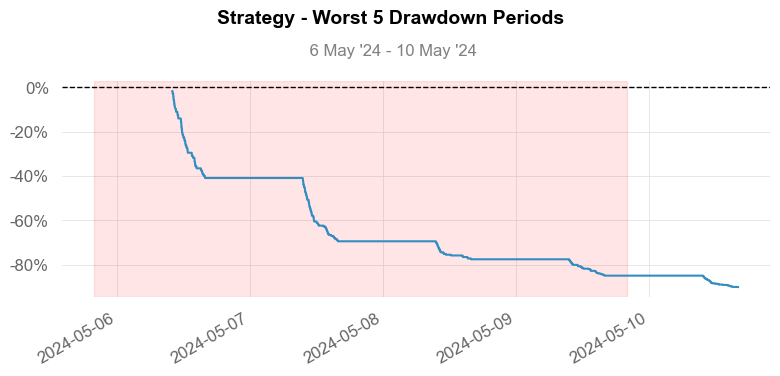

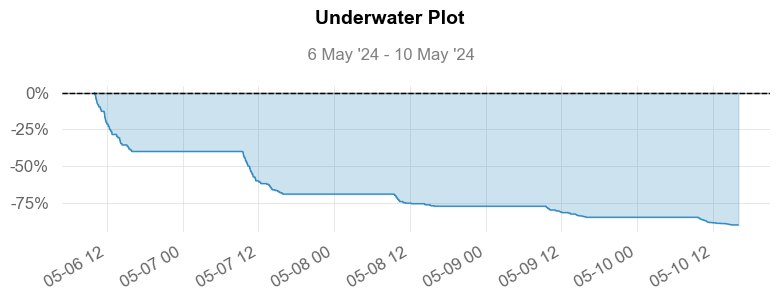

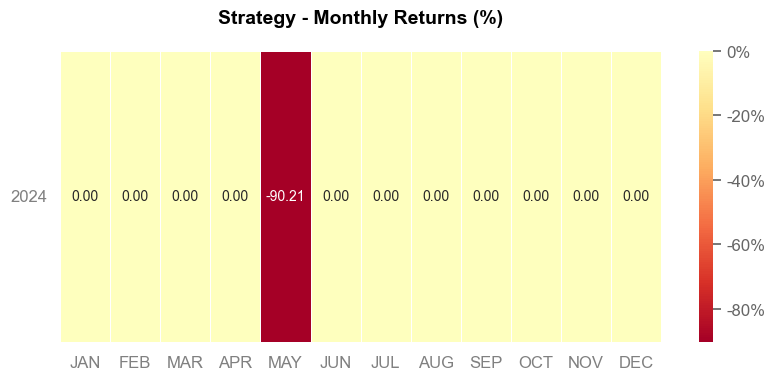

D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
D:\all projects\stock-traiding\.venv_2\lib\site-packages\quantstats\_plotting\core.py:1019: FutureWarni

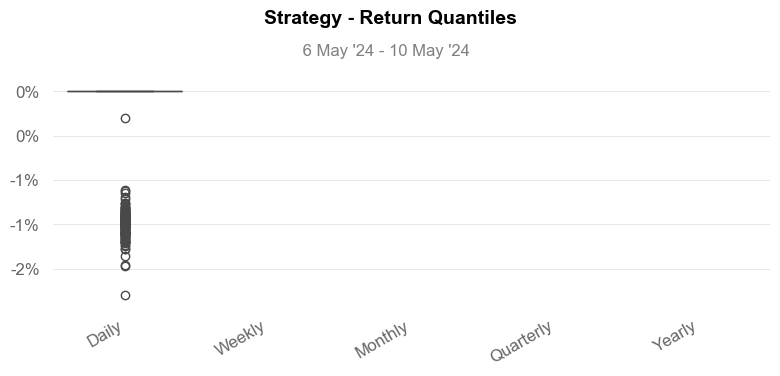

In [3]:
qs.extend_pandas()
# qs.plots.snapshot(data, title='Facebook Performance', show=True)
# print(env.unwrapped.history['total_profit'])
net_worth = pd.Series(env.unwrapped.history['total_profit'], index=data.index[30+1:len(data)])
# net_worth = pd.Series(env.unwrapped.history['total_profit'], index=data.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='SB3_a2c_quantstats.html')